In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df = pd.read_csv('cars1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0
...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0


In [34]:
X = df.iloc[:, [True,True,False,True,True,True,True,True,True]]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,model,year,type,distance,fuel,tax,miles per galoon,size
0,7,2016,2,28526.0,0,160,50.4,2.0
1,2,2015,1,27016.0,0,30,62.8,2.0
2,2,2016,2,29845.0,1,160,45.6,2.0
3,3,2017,0,44783.0,0,145,62.8,2.0
4,7,2014,0,43195.0,0,200,47.9,2.0
...,...,...,...,...,...,...,...,...
295,3,2017,1,20052.0,1,145,49.6,2.0
296,3,2015,2,35903.0,0,145,56.5,2.0
297,1,2019,1,7307.0,0,145,51.4,1.6
298,7,2015,2,40256.0,0,160,50.4,2.0


In [35]:
f1 = ['year']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([3236.07198805]), -6505793.102800729)

Линейная регрессия имеет вид Цена = 3236.07198805*Год-6505793.102800729

In [36]:
y_pred = sr.predict(X_test[f1])
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.371, 0.523)

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(6732.88, 6729.8)

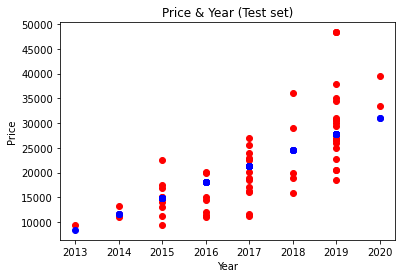

In [38]:
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], sr.predict(X_test[f1]), 'bo')
plt.title('Price & Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

График показал, чем моложе автомобиль, тем выше его цена

In [39]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.838

Коэффициент регрессии = 0,838

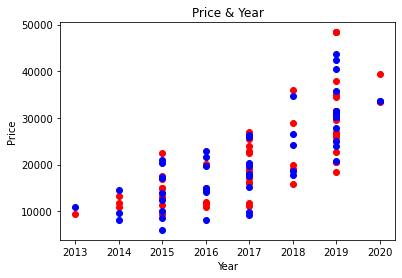

In [40]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], mr.predict(X_test), 'bo')
plt.title('Price & Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [41]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           7.15e-87
Time:                        10:12:42   Log-Likelihood:                -2293.2
No. Observations:                 240   AIC:                             4604.
Df Residuals:                     231   BIC:                             4636.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.768e+06   3.98e+05     -9.457      0.000   -4.55e+06   -2.98e+06
model              225.4543    102.964      2.190      0.030      22.585     428.323
year              1882.4842    197.143      9.549      0.000    1494.056    2270.912
type              1423.0793    331.778      4.289      0.000     769.381    2076.777
distance            -0.0995      0.017     -5.919      0.000      -0.133      -0.066
fuel             -2573.9361    763.728     -3.370      0.001   -4078.700   -1069.172
tax                -14.1916      5.262     -2.697      0.008     -24.560      -3.823
miles per galoon  -315.8607     45.405     -6.956      0.000    -405.322    -226.399
size              6160.5320    721.958      8.533      0.000    4738.068    7582.996
==============================================================================
Omnibus:                       30.200   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.112
Skew:                           0.476   Prob(JB):                     3.66e-21
Kurtosis:                       5.916   Cond. No.                     5.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Число обусловленности большое и равно 5.93e+07. Это может указывать на то, что есть
сильная мультиколлинеарность или другие числовые проблемы.

In [42]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 5.76922165e+06,  8.62520554e+04,  9.13596183e+03, -2.25443096e+05,
        -2.39802145e+01,  2.19167718e+06, -2.60969770e+03,  2.71512724e+05,
         2.36830326e+05, -1.49995225e+02, -4.44692903e+01,  3.55219671e+02,
        -7.15302331e-03,  6.92072014e+02,  5.55235568e+00,  4.37662100e+01,
         8.03343328e+02,  1.70990208e-01,  1.06750345e+02,  1.18471558e-02,
        -2.16796996e+03,  1.21177250e+00, -1.34728287e+02, -9.94851032e+01,
         1.68004708e+03,  8.43838485e-03,  1.79259113e+03, -4.74550582e-01,
         9.91338685e+01,  2.57473759e+02,  4.03932063e-07, -3.28141805e-02,
         4.82768584e-04,  1.45247510e-03, -6.28321599e-02,  2.19166498e+06,
        -4.87523694e+00, -7.25608493e+01, -6.11403731e+03,  4.91255893e-01,
         2.05351264e+00, -3.96502475e+01,  1.51940990e+00, -3.58363331e+02,
        -1.67253921e+03]),
 -24880219.010541312)

In [43]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.924

R^2 лучше для множественной линейной регресси.

In [44]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(2342.43, 3021.41)

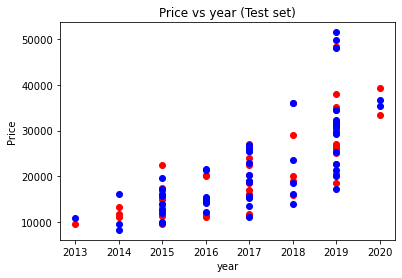

In [45]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], pr.predict(X_test_p), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()


In [46]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('cars2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()